# Testing different models (Adult_data)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix ,classification_report 

### Parameters

In [3]:
RAND_STATE = 0

### Loading the cleaned data

In [3]:
df = pd.read_csv("dataset_labels_scaled.csv",index_col = 0)

In [4]:
pd.set_option("display.max_colwidth",1000)
pd.read_csv("my_labels_codes.csv",index_col = 0)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
classes,[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'\n ' Self-emp-not-inc' ' State-gov' ' Without-pay'],[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'\n ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'\n ' Masters' ' Preschool' ' Prof-school' ' Some-college'],[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'\n ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed'],[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'\n ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'\n ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'\n ' Sales' ' Tech-support' ' Transport-moving'],[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'\n ' Wife'],[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White'],[' Female' ' Male'],[' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba' ' Dominican-Republic'\n ' Ecuador' ' El-Salvador' ' England' ' France' ' Germany' ' Greece'\n ' Guatemala' ' Haiti' ' Holand-Netherlands' ' Honduras' ' Hong'\n ' Hungary' ' India' ' Iran' ' Ireland' ' Italy' ' Jamaica' ' Japan'\n ' Laos' ' Mexico' ' Nicaragua' ' Outlying-US(Guam-USVI-etc)' ' Peru'\n ' Philippines' ' Poland' ' Portugal' ' Puerto-Rico' ' Scotland' ' South'\n ' Taiwan' ' Thailand' ' Trinadad&Tobago' ' United-States' ' Vietnam'\n ' Yugoslavia'],[' <=50K' ' >50K']
labels,[0 1 2 3 4 5 6],[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15],[0 1 2 3 4 5 6],[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13],[0 1 2 3 4 5],[0 1 2 3 4],[0 1],[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23\n 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40],[0 1]


In [5]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
7982,1.244697,2,-0.130566,11,-0.438122,0,8,1,4,0,-0.146733,-0.218780,-0.078120,9,0
8358,0.261169,2,-0.403602,11,-0.438122,0,7,4,4,0,-0.146733,-0.218780,-0.910942,38,0
38368,-0.949327,4,0.055863,0,-1.613277,4,3,1,4,1,-0.146733,-0.218780,2.836755,38,1
18285,0.866417,2,-0.433383,11,-0.438122,2,11,0,4,1,-0.146733,-0.218780,2.003934,38,1
19638,-0.344079,2,1.058864,11,-0.438122,4,3,4,4,0,-0.146733,-0.218780,-0.494531,38,0
20097,0.034201,2,-0.949618,8,0.345316,0,7,1,0,0,-0.146733,-0.218780,-0.078120,3,0
19524,-1.327607,2,0.250348,15,-0.046403,4,11,3,4,1,-0.146733,-0.218780,-0.494531,38,0
20560,0.034201,2,2.195216,15,-0.046403,0,10,4,2,0,-0.146733,-0.218780,-0.910942,38,0
2721,-0.344079,2,-0.947488,15,-0.046403,2,11,0,4,1,-0.146733,-0.218780,1.171112,38,1
4632,1.547321,2,-0.775305,0,-1.613277,2,13,0,4,1,-0.146733,3.448325,-0.078120,38,1


>First we will create a __Test Data__ isolated from the whole process of feeding the model just to validate our training(a random sample around 1/3 of total size), then with the remaining (__Training Data__) we will train or different models and try to find or best hyperparameter with cross-validation. In this example we will use RandomForest and Decision Tree.
>
>&nbsp;
>
>![Foo](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [6]:
training_data, testing_data = train_test_split(df, test_size=0.30, random_state=RAND_STATE)

In [7]:
print("Shape:{}".format(testing_data.shape))
testing_data.sample(5)

Shape:(13567, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
11079,-0.268423,2,-0.375601,15,-0.046403,2,3,0,4,1,-0.146733,-0.21878,-0.078120,38,1
46989,0.563793,2,-0.344637,15,-0.046403,4,5,4,2,0,-0.146733,-0.21878,-0.078120,38,0
40818,-1.630231,1,-0.468531,1,-1.221559,4,0,3,4,0,-0.146733,-0.21878,-1.743763,38,0
13891,0.715105,2,-0.680491,15,-0.046403,2,9,0,4,1,-0.146733,-0.21878,-0.078120,38,1
22940,-1.024983,2,0.729711,13,-3.571870,4,4,1,4,1,-0.146733,-0.21878,-0.494531,25,0


In [8]:
print("Shape:{}".format(training_data.shape))
training_data.sample(5)

Shape:(31655, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
2612,-0.571047,5,-0.691586,11,-0.438122,2,11,0,4,1,-0.146733,-0.21878,-0.078120,38,0
16976,-1.176295,2,0.259701,9,1.128753,4,0,3,4,0,-0.146733,-0.21878,-0.078120,38,0
11772,0.109857,2,-0.384641,11,-0.438122,3,5,1,4,1,0.142888,-0.21878,1.587523,30,0
18031,0.412481,2,-0.163386,11,-0.438122,0,0,1,1,0,-0.146733,-0.21878,-0.078120,39,0
14049,-0.041455,2,-0.683530,9,1.128753,4,7,2,4,0,-0.146733,-0.21878,0.338291,38,0


In [9]:
X = training_data.iloc[:,:-1].values
X.shape

(31655, 14)

In [10]:
y = training_data.iloc[:,-1].values
y.shape

(31655,)

In [11]:
X_test = testing_data.iloc[:,:-1].values
X_test.shape

(13567, 14)

In [12]:
y_test = testing_data.iloc[:,-1].values
y_test.shape

(13567,)


>As it can be observed data is now split in 4 arrays:
>* __training_data:__
    1. X: (31655, 14)
    2. y: (31655, 1)   
>&nbsp;
>* __test_data:__
    3. X_test: (13567, 14) 
    4. y_test: (13567, 1)

# Parameter tuning using GridSearchCV (CrossVal model) 

> First we will define the parameter values to be searched.
> Then we will create a parameter grid: map the parameter names to the values that should be searched.
> And finally instantiate and fit the grid
>
> ### First Approach:
>We still don't know anything about how will our model behave under any parameter so we will apply a variety of >parameters in any iteration and try to figure out where are the best ranges in which we can extend our precision
>
>__For this example we will use Accuracy as our scoring metric__

In [354]:
n_estimators = [10,50,100,200]
max_depth = list(range(1, 22,2))
criterion = ['gini',"entropy"]
param_grid = {"n_estimators":n_estimators, "max_depth":max_depth,"criterion":criterion}

print(param_grid)

{'n_estimators': [10, 50, 100, 200], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'criterion': ['gini', 'entropy']}


In [1]:
clf_rf = RandomForestClassifier(random_state=RAND_STATE,n_jobs = -1)
clf_rf

NameError: name 'RandomForestClassifier' is not defined

In [4]:
results = pd.read_csv("1st_result_grid.csv",index_col = 0)
results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.191492,0.316208,0.103533,0.000670,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.750474,0.750474,...,0.750474,0.750474,0.750474,0.750395,0.750395,0.750395,0.750632,0.750466,0.000066,84
1,0.362791,0.060122,0.104748,0.001687,gini,1,50,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.774163,0.772268,...,0.769425,0.775426,0.774163,0.774092,0.771880,0.772828,0.768963,0.772611,0.001979,82


In [5]:
ind_vals = [4,5,6,18]
results = results.iloc[:,ind_vals]
results.head()

,param_criterion,param_max_depth,param_n_estimators,mean_test_score
0,gini,1,10,0.750466
1,gini,1,50,0.772611
2,gini,1,100,0.750466
3,gini,1,200,0.755363
4,gini,3,10,0.825336


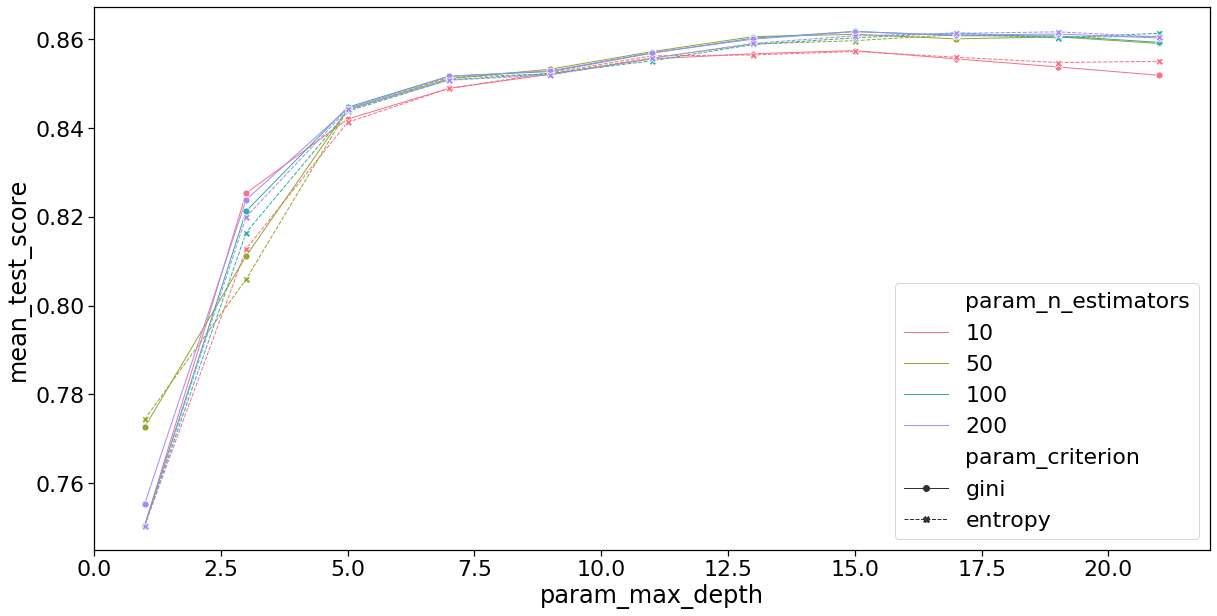

In [7]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(1 ,1,figsize=(20,10))
palette = sns.color_palette("husl", 4)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_n_estimators",  \
             style="param_criterion" ,\
             markers = True, palette=palette, data=results,ax=ax,\
             ms= 7, linewidth = 1)


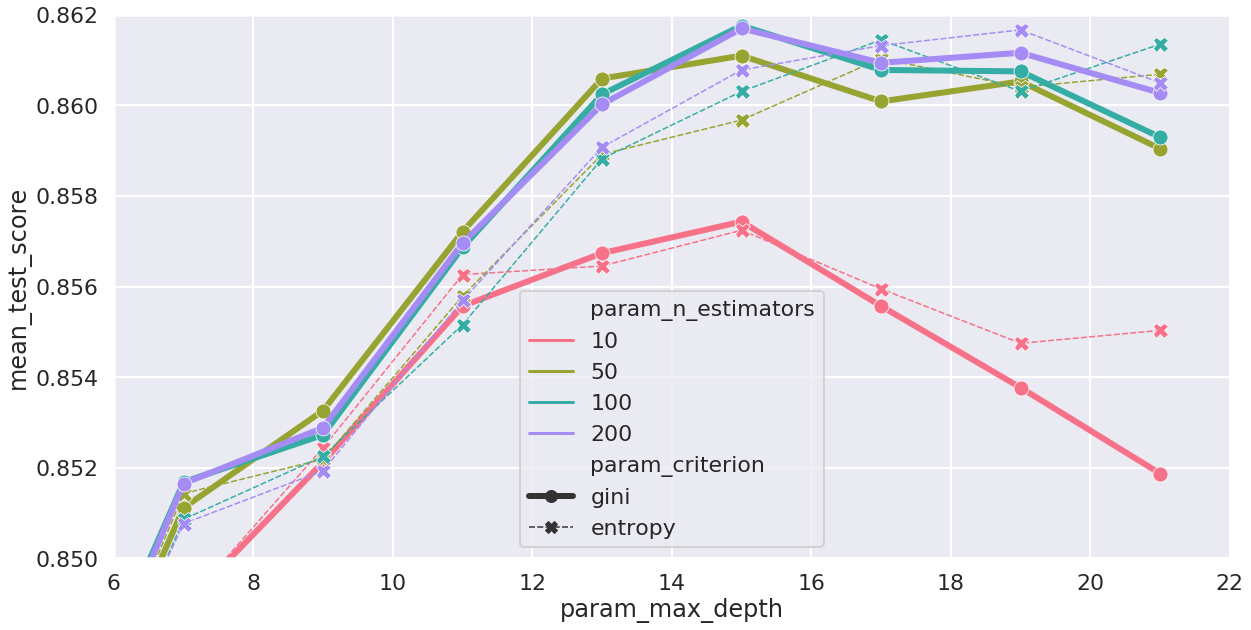

In [9]:
sns.set(font_scale=2)
sns.set_context("poster")

fig, ax = plt.subplots(1 ,1,figsize=(20,10))

palette = sns.color_palette("husl", 4)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_n_estimators",  \
             style="param_criterion",size = "param_criterion" ,\
             markers = True, palette=palette, data=results,ax=ax,\
             ms= 15, lw = 200)
plt.ylim(.85,.862)
plt.xlim(6, 22)

sns.set(font_scale=1)

> #### Our best estimator is : 
~~~~~~~
 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100},
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=15, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                        warm_start=False))
~~~~~~~
With an score of: __0.8618__

> ### Second Approach:
>We can observe that there exist a range in which our accuracy was maximum (0.8618). The parameter that achieve it were:
>* 'criterion': 'gini'
>* 'max_depth': 15
>* 'n_estimators': 100},
>
> We can see in the figure above that criterion "gini" on average performed always better than "entropy". A reasonable hyptohesis whould be to drop entropy criterion and just go ahead with gini since it will perform better around depth 15. We could aso try to see if "entropy" criterion performance reaches a new maximun at higher values since at the moment we reached the depth 15 "gini" performance started decaying and entropy behaved better. 
> Also we can observe that maximum was reached at n_estimators 100 so we will extend our range around 100 (from 50 to 200)
>Since we can test different sets of parameters we will introduce different ranges for the two criterions

In [379]:
n_estimators =list(range(50, 200,25)) 
max_depth_gini = list(range(13, 18,1))
max_depth_entr = list(range(16, 24,1))
param_grid_2nd = [{"n_estimators":n_estimators, "max_depth":max_depth_entr,"criterion":["entropy"]},\
             {"n_estimators":n_estimators, "max_depth":max_depth_gini,"criterion":["gini"]}]
print(param_grid_2nd)

[{'n_estimators': [50, 75, 100, 125, 150, 175], 'max_depth': [16, 17, 18, 19, 20, 21, 22, 23], 'criterion': ['entropy']}, {'n_estimators': [50, 75, 100, 125, 150, 175], 'max_depth': [13, 14, 15, 16, 17], 'criterion': ['gini']}]


In [380]:
clf_rf = RandomForestClassifier(random_state=RAND_STATE,n_jobs = -1)
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [382]:
grid_2nd = GridSearchCV(clf_rf, param_grid_2nd, cv=10, scoring='accuracy', return_train_score=False)
grid_2nd

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=Fal...=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['

In [398]:
results_2nd = pd.read_csv("2nd_result_grid.csv",index_col = 0)
results_2nd.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.066515,0.316156,0.103381,0.000709,entropy,16,50,"{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 50}",0.856917,0.861655,...,0.857233,0.862603,0.856917,0.857188,0.869826,0.863191,0.857143,0.860275,0.003978,57


In [399]:
ind_vals = [4,5,6,18]
results_2nd = results_2nd.iloc[:,ind_vals]
results_2nd.head(10)

,param_criterion,param_max_depth,param_n_estimators,mean_test_score
0,entropy,16,50,0.860275
1,entropy,16,75,0.861128
2,entropy,16,100,0.861444
3,entropy,16,125,0.861791
4,entropy,16,150,0.861570
5,entropy,16,175,0.861381
6,entropy,17,50,0.861033
7,entropy,17,75,0.861001
8,entropy,17,100,0.861444
9,entropy,17,125,0.861760


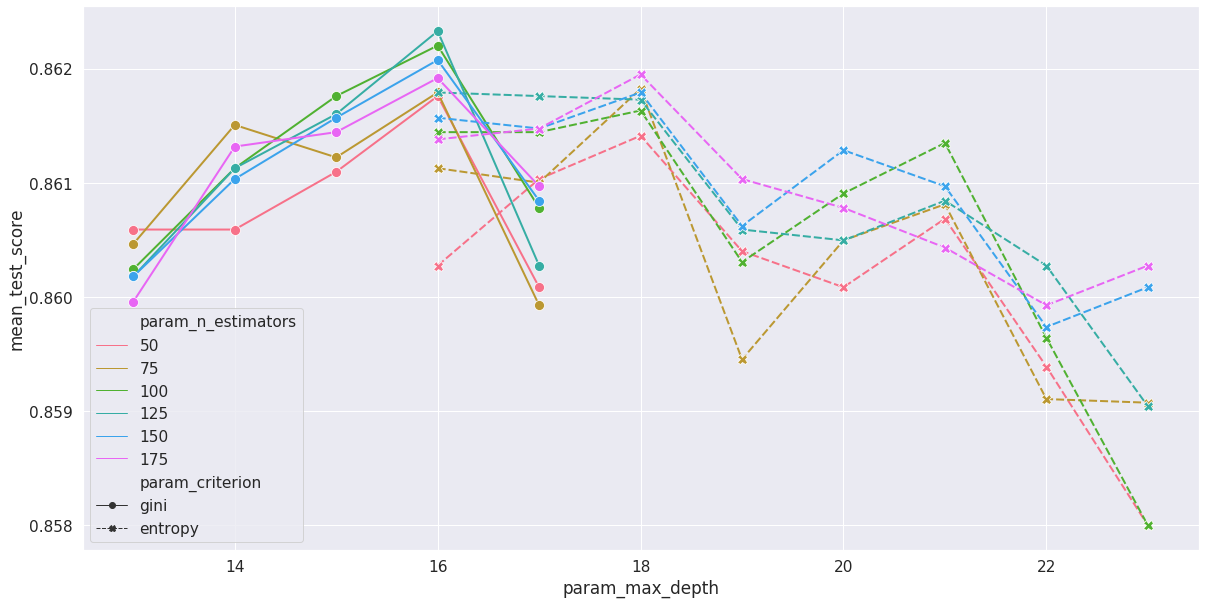

In [435]:
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(1 ,1,figsize=(20,10))
palette = sns.color_palette("husl", 6)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_n_estimators",  \
             style="param_criterion",style_order = ["gini","entropy"],\
             markers = True, palette=palette, data=results_2nd,ax=ax,\
             ms= 10, linewidth = 2)


(14.5, 21.5)

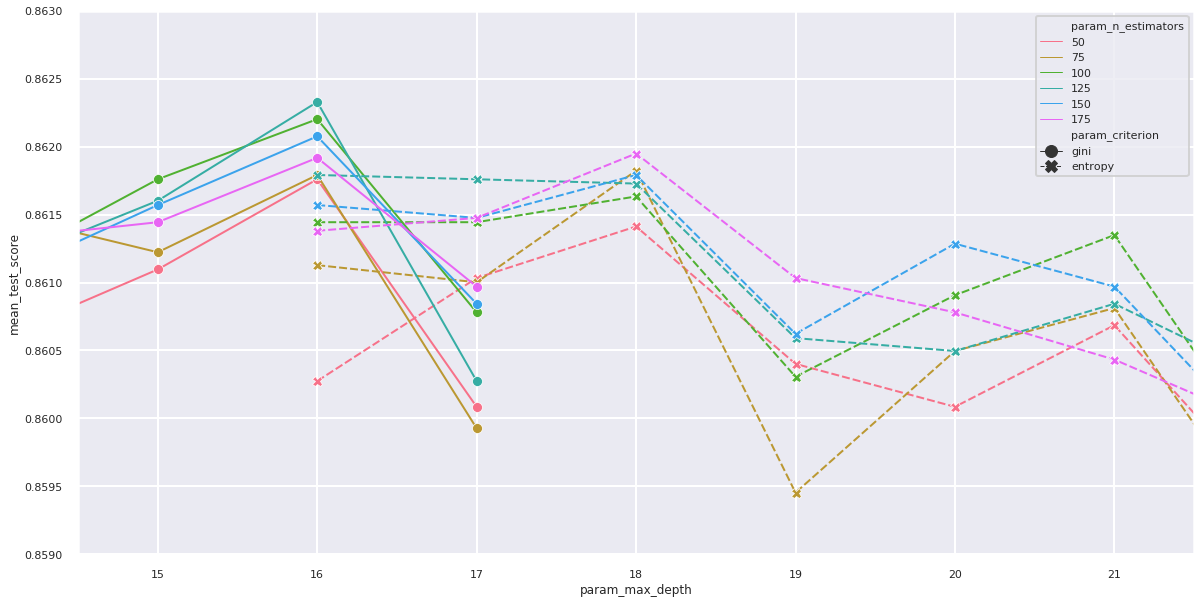

In [424]:
sns.set_context("poster", font_scale=.5, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(1 ,1,figsize=(20,10))

palette = sns.color_palette("husl", 6)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_n_estimators",  \
             style="param_criterion" ,style_order = ["gini","entropy"],\
             markers = True, palette=palette, data=results_2nd,ax=ax,\
             ms= 10, lw = 2)
plt.ylim(.859,.863)
plt.xlim(14.5, 21.5)



> #### Our best estimator now is : 
~~~~~~~
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
~~~~~~~
>With an score of : __0.8623__
>
> - First parameters : {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}
> - Second parameters : {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 125}

In [471]:
clf_rf_def = RandomForestClassifier(random_state=RAND_STATE,n_jobs = -1,\
                                criterion= 'gini', max_depth= 16, n_estimators= 125)
clf_rf_def.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [472]:
clf_rf_def.score(X_test,y_test)

0.8626077983341932

In [474]:
y_pred = clf_rf_def.predict(X_test)   
conf_mat = confusion_matrix(y_test, y_pred,labels = [0,1]  )
conf_mat

array([[9681,  577],
       [1287, 2022]])

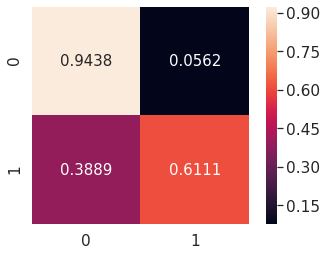

In [476]:
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
conf_mat_norm
sns.heatmap(conf_mat_norm,square=True,robust=True,annot = True,fmt =".4f",annot_kws={"size": 15})

In [477]:
print(classification_report(y_test, y_pred,labels = [0,1]))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10258
           1       0.78      0.61      0.68      3309

    accuracy                           0.86     13567
   macro avg       0.83      0.78      0.80     13567
weighted avg       0.86      0.86      0.86     13567



# RandomizedSearchCV + Decision Tree

In [483]:
clf_dt = DecisionTreeClassifier(random_state=RAND_STATE)

In [549]:
max_depth = list(range(1, 22,2))
criterion = ['gini',"entropy"]
splitter = ["best","random"]
param_rand = {"splitter":splitter, "max_depth":max_depth,"criterion":criterion}

print(param_rand)

{'splitter': ['best', 'random'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'criterion': ['gini', 'entropy']}


In [519]:
best_scores[-1]

[0.851, {'splitter': 'best', 'max_depth': 7, 'criterion': 'entropy'}]

In [497]:
my_dt_results = pd.DataFrame(rand.cv_results_).iloc[:,[4,5,6,18]]
my_dt_results

,param_splitter,param_max_depth,param_criterion,mean_test_score
0,best,9,entropy,0.850134
1,random,15,entropy,0.841700
2,random,5,entropy,0.816553
3,best,5,gini,0.849313
4,best,11,gini,0.849976
5,random,3,entropy,0.768220
6,best,7,entropy,0.851398
7,random,11,gini,0.842900
8,best,17,entropy,0.836645
9,random,9,entropy,0.837751


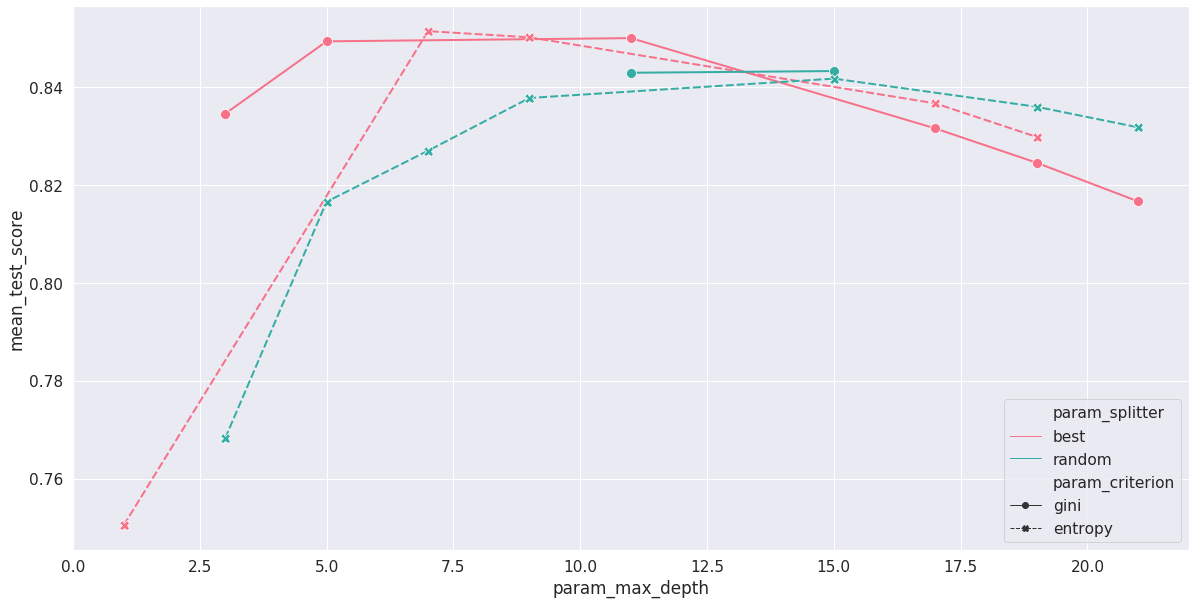

In [498]:
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(1 ,1,figsize=(20,10))
palette = sns.color_palette("husl", 2)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_splitter",  \
             style="param_criterion",style_order = ["gini","entropy"],\
             markers = True, palette=palette, data=my_dt_results,ax=ax,\
             ms= 10, linewidth = 2)


> We can see that the splitter "best" outperforms "random" in all the values for depth below 15 and after that still is not able to perform better than the maximun obtained by "best". Thus, we will leave "random" out during the next selection. 
This time we will try depths around where we obtained the maximum accuracy (0.851), 7.

In [501]:
max_depth = list(range(1,13,1))
criterion = ['gini',"entropy"]
param_rand_2nd = {"max_depth":max_depth,"criterion":criterion}

print(param_rand_2nd)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['gini', 'entropy']}


In [509]:
my_dt_results_2nd = pd.DataFrame(rand_2nd.cv_results_).iloc[:,[4,5,6,17]]
my_dt_results_2nd.sort_values(by=["param_criterion","param_max_depth"])

,param_max_depth,param_criterion,params,mean_test_score
6,2,entropy,"{'max_depth': 2, 'criterion': 'entropy'}",0.817375
3,3,entropy,"{'max_depth': 3, 'criterion': 'entropy'}",0.834529
8,5,entropy,"{'max_depth': 5, 'criterion': 'entropy'}",0.847165
4,9,entropy,"{'max_depth': 9, 'criterion': 'entropy'}",0.850134
2,11,entropy,"{'max_depth': 11, 'criterion': 'entropy'}",0.849660
7,12,entropy,"{'max_depth': 12, 'criterion': 'entropy'}",0.849629
5,2,gini,"{'max_depth': 2, 'criterion': 'gini'}",0.820818
9,9,gini,"{'max_depth': 9, 'criterion': 'gini'}",0.850956
1,11,gini,"{'max_depth': 11, 'criterion': 'gini'}",0.849976
0,12,gini,"{'max_depth': 12, 'criterion': 'gini'}",0.847891


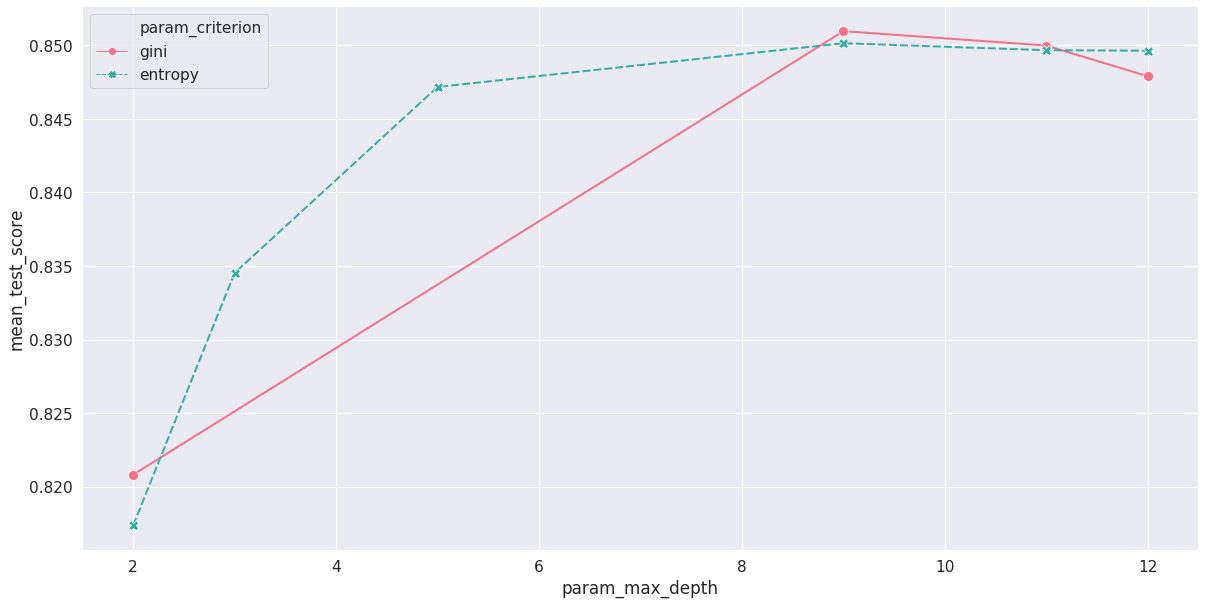

In [512]:
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(1 ,1,figsize=(20,10))
palette = sns.color_palette("husl", 2)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_criterion",  \
             style="param_criterion",style_order = ["gini","entropy"],\
             markers = True, palette=palette, data=my_dt_results_2nd,ax=ax,\
             ms= 10, linewidth = 2)


In [520]:
print(best_scores_2nd[-1])

[0.851, {'max_depth': 9, 'criterion': 'gini'}]


### Training the model with all the data:

In [542]:
clf_dt_def = tree.DecisionTreeClassifier(random_state=RAND_STATE,max_depth=9,criterion="gini")

In [543]:
clf_dt_def.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [544]:
clf_dt_def.score(X_test,y_test)

0.8498562688877423

In [545]:
y_pred = clf_dt_def.predict(X_test)   
conf_mat = confusion_matrix(y_test, y_pred,labels = [0,1]  )
conf_mat

array([[9348,  910],
       [1127, 2182]])

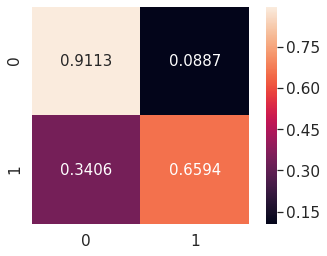

In [546]:
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
conf_mat_norm
sns.heatmap(conf_mat_norm,square=True,robust=True,annot = True,fmt =".4f",annot_kws={"size": 15})

In [547]:
print(classification_report(y_test, y_pred,labels = [0,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     10258
           1       0.71      0.66      0.68      3309

    accuracy                           0.85     13567
   macro avg       0.80      0.79      0.79     13567
weighted avg       0.85      0.85      0.85     13567



From the __RandomForest__:
~~~~~~~~
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10258
           1       0.78      0.61      0.68      3309

    accuracy                           0.86     13567
   macro avg       0.83      0.78      0.80     13567
weighted avg       0.86      0.86      0.86     13567
~~~~~~~~

### Using f1 as score

>We see that we are always doing not that good at avoiding False Negatives, let's try changing the score metrics in our RandomizedSearchCV

In [551]:
clf_dt = DecisionTreeClassifier(random_state=RAND_STATE)

In [552]:
max_depth = list(range(1, 22,2))
criterion = ['gini',"entropy"]
splitter = ["best","random"]
param_rand_f1 = {"splitter":splitter, "max_depth":max_depth,"criterion":criterion}

print(param_rand_f1)

{'splitter': ['best', 'random'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'criterion': ['gini', 'entropy']}


In [558]:
my_dt_results_f1 = pd.DataFrame(rand_f1.cv_results_).iloc[:,[4,5,6,18]]
my_dt_results_f1.sort_values(by=["param_criterion","param_max_depth"])

,param_splitter,param_max_depth,param_criterion,mean_test_score
17,best,1,entropy,0.000000
5,random,3,entropy,0.136010
2,random,5,entropy,0.560835
6,best,7,entropy,0.642902
10,random,7,entropy,0.576921
0,best,9,entropy,0.678047
9,random,9,entropy,0.619550
1,random,15,entropy,0.647301
8,best,17,entropy,0.656034
12,random,19,entropy,0.648006


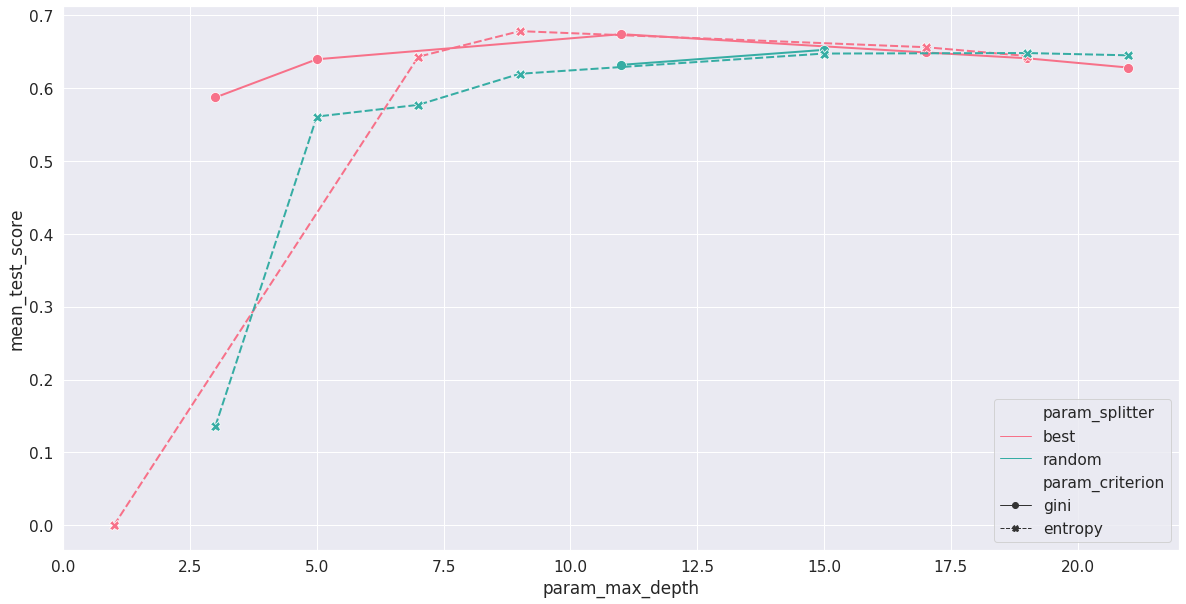

In [560]:
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(1 ,1,figsize=(20,10))
palette = sns.color_palette("husl", 2)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_splitter",  \
             style="param_criterion",style_order = ["gini","entropy"],\
             markers = True, palette=palette, data=my_dt_results_f1,ax=ax,\
             ms= 10, linewidth = 2)

~~~~~~~~
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=0, splitter='best'), 
~~~~~~~~                        
Best F1Score of : __0.6780__


In [583]:
max_depth = list(range(6, 15,1))
criterion = ['gini',"entropy"]
param_grid_f1 = {"max_depth":max_depth,"criterion":criterion}

print(param_grid_f1)

{'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14], 'criterion': ['gini', 'entropy']}


In [584]:
grid_f1 = GridSearchCV(clf_rf, param_grid_f1, cv=10, scoring='f1', return_train_score=False)
grid_f1

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=16,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=125, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criteri

In [585]:
grid_f1.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=16,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=125, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criteri

In [586]:
my_dt_results_f1_grid = pd.DataFrame(grid_f1.cv_results_).iloc[:,[4,5,17]]
my_dt_results_f1_grid.sort_values(by=["param_criterion","param_max_depth"])

,param_criterion,param_max_depth,mean_test_score
9,entropy,6,0.631039
10,entropy,7,0.639703
11,entropy,8,0.642506
12,entropy,9,0.645410
13,entropy,10,0.650939
14,entropy,11,0.658928
15,entropy,12,0.668198
16,entropy,13,0.675010
17,entropy,14,0.679600
0,gini,6,0.633433


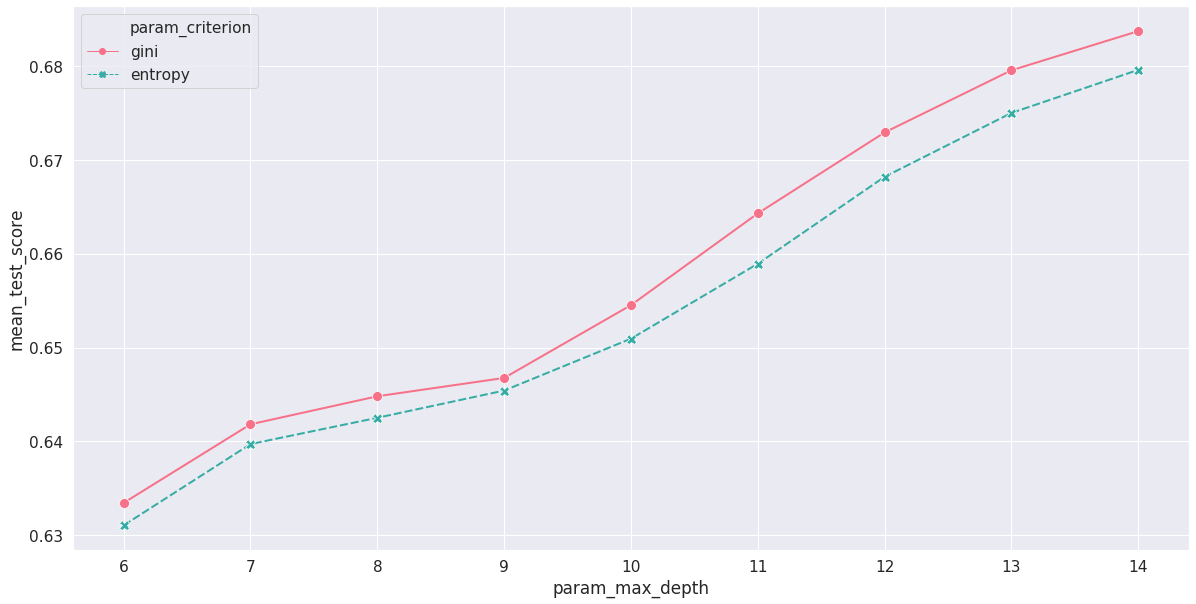

In [587]:
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(1 ,1,figsize=(20,10))
palette = sns.color_palette("husl", 2)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_criterion",  \
             style="param_criterion",style_order = ["gini","entropy"],\
             markers = True, palette=palette, data=my_dt_results_f1_grid,ax=ax,\
             ms= 10, linewidth = 2)

In [588]:
grid_f1.best_estimator_, grid_f1.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=14, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=125,
                        n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                        warm_start=False), 0.6837329688172845)

### 2nd approach

In [576]:
max_depth = list(range(16, 25,1))
criterion = ['gini',"entropy"]
param_grid_f1 = {"max_depth":max_depth,"criterion":criterion}

print(param_grid_f1)

{'max_depth': [16, 17, 18, 19, 20, 21, 22, 23, 24], 'criterion': ['gini', 'entropy']}


In [577]:
grid_f1 = GridSearchCV(clf_rf, param_grid_f1, cv=10, scoring='f1', return_train_score=False)
grid_f1.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=16,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=125, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criteri

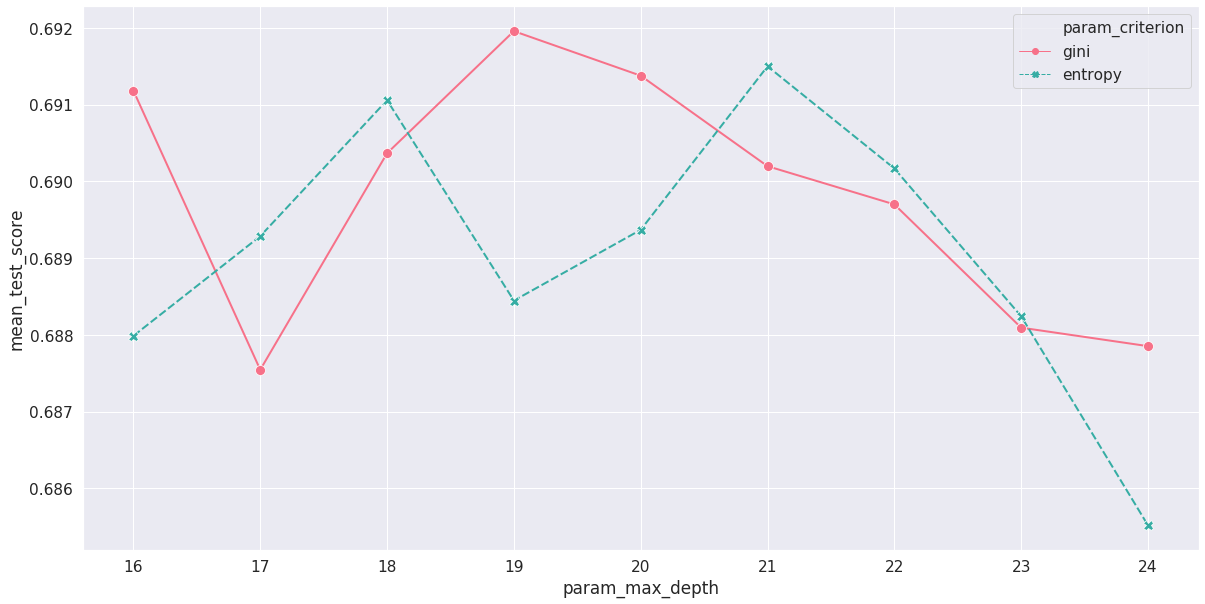

In [581]:
my_dt_results_f1_grid = pd.DataFrame(grid_f1.cv_results_).iloc[:,[4,5,17]]
my_dt_results_f1_grid.sort_values(by=["param_criterion","param_max_depth"])

sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1})

fig, ax = plt.subplots(1 ,1,figsize=(20,10))
palette = sns.color_palette("husl", 2)
sns.lineplot(x="param_max_depth", y="mean_test_score",hue="param_criterion",  \
             style="param_criterion",style_order = ["gini","entropy"],\
             markers = True, palette=palette, data=my_dt_results_f1_grid,ax=ax,\
             ms= 10, linewidth = 2)

In [582]:
grid_f1.best_estimator_, grid_f1.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=19, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=125,
                        n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                        warm_start=False), 0.6919563005268076)

In [589]:
clf_dt_f1_def = tree.DecisionTreeClassifier(random_state=RAND_STATE,max_depth=19,criterion="gini")

In [595]:
clf_dt_f1_def.fit(X,y)
clf_dt_f1_def.score(X_test,y_test)

0.8276700818161716

In [596]:
y_pred = clf_dt_def.predict(X_test)   
conf_mat = confusion_matrix(y_test, y_pred,labels = [0,1]  )
conf_mat

array([[9348,  910],
       [1127, 2182]])

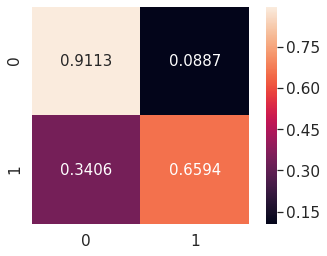

In [597]:
conf_mat_norm_f1 = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_mat_norm_f1,square=True,robust=True,annot = True,fmt =".4f",annot_kws={"size": 15})

In [593]:
print(classification_report(y_test, y_pred,labels = [0,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     10258
           1       0.71      0.66      0.68      3309

    accuracy                           0.85     13567
   macro avg       0.80      0.79      0.79     13567
weighted avg       0.85      0.85      0.85     13567



From the __RandomForest__:
~~~~~~~~
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10258
           1       0.78      0.61      0.68      3309

    accuracy                           0.86     13567
   macro avg       0.83      0.78      0.80     13567
weighted avg       0.86      0.86      0.86     13567
~~~~~~~~

From the __DecisionTree__:
~~~~~~~~
             precision    recall  f1-score   support

            0       0.89      0.91      0.90     10258
           1       0.71      0.66      0.68      3309

    accuracy                           0.85     13567
   macro avg       0.80      0.79      0.79     13567
weighted avg       0.85      0.85      0.85     13567
~~~~~~~~